In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('summary.csv')
bad_points = df[df.status == 'error']
df = df[df.status != 'error']

In [4]:
baseline = df.iloc[0]
print(baseline)

status                             ok
partition                           1
bench          baseline:gemm-baseline
bram_used                          44
dsp_used                            3
lut_used                         1535
lutmem_used                       137
reg_used                         2642
uram_used                           0
runtime_avg                   10.4164
runtime_std                0.00853253
Name: 0, dtype: object


In [5]:
info_keys = [ 
    'partition',
]
keys = [
    'lut_used',
    'lutmem_used',
    'bram_used',
    'dsp_used',
    'reg_used',
    'runtime_avg',
]

In [6]:
normalized_df = df.copy()
for key in keys:
    norm_val = baseline[key]
    normalized_df[key] = normalized_df[key].apply(lambda v: v / norm_val)
normalized_df = normalized_df[info_keys + keys]
print(normalized_df)

   partition   lut_used  lutmem_used  bram_used   dsp_used  reg_used  \
0          1   1.000000     1.000000   1.000000   1.000000  1.000000   
1          2   0.983713     0.912409   1.045455   2.000000  0.961014   
2          3   4.439739     2.985401   1.340909  11.333333  2.576836   
3          4   1.082736     0.912409   1.113636   4.000000  1.064724   
4          5   6.886645     4.248175   1.386364  18.666667  3.682816   
6          7   9.482085     5.583942   1.931818  26.000000  5.245269   
7          8   1.231922     0.919708   1.113636   8.000000  1.150643   
9         10  13.779805     7.386861   1.386364  37.000000  6.764951   

   runtime_avg  
0     1.000000  
1     0.640726  
2     1.106221  
3     0.647138  
4     1.062455  
6     1.043799  
7     0.653254  
9     1.005215  


In [7]:
long = pd.melt(normalized_df, id_vars=['partition'], var_name='metrics', value_name='values')
long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
partition    48 non-null int64
metrics      48 non-null object
values       48 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


Text(0.5, 0, 'Partitioning and Unrolling Factor')

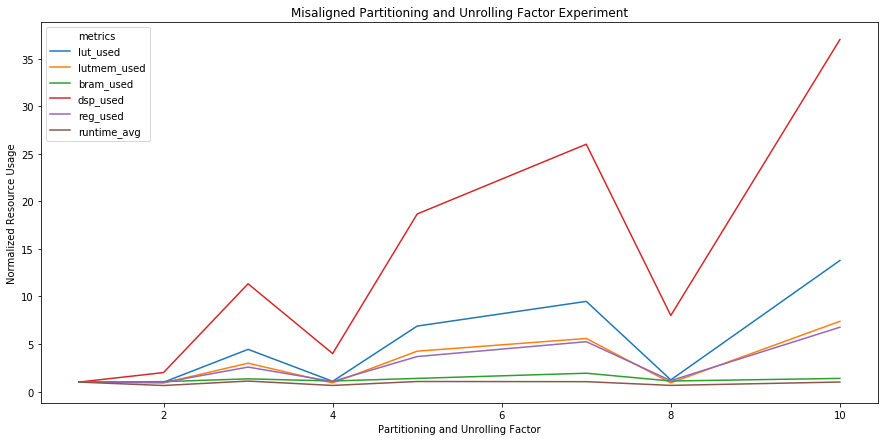

In [8]:
plt.figure(figsize=(15, 7))
plot = sns.lineplot(x='partition', y='values', hue='metrics', data=long)
plot.set_title('Misaligned Partitioning and Unrolling Factor Experiment')
plot.set_ylabel('Normalized Resource Usage')
plot.set_xlabel('Partitioning and Unrolling Factor')

In [9]:
plot.figure.savefig('normalized_resources.png', dpi=300)

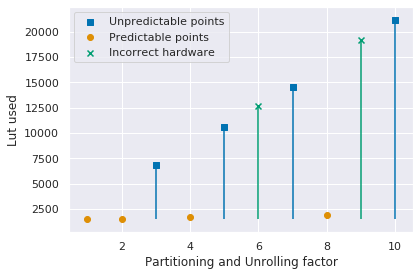

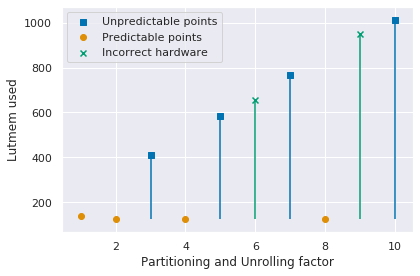

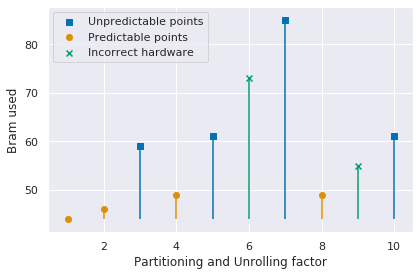

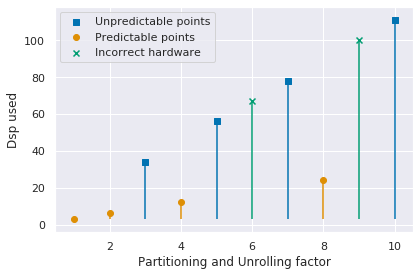

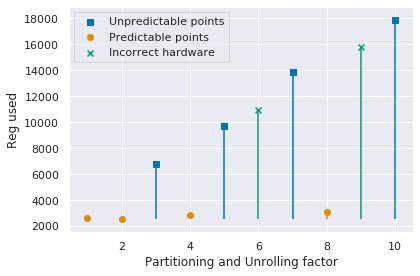

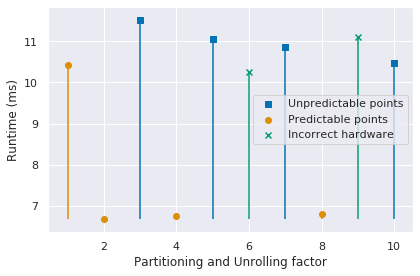

In [10]:
import math
sns.set()

pal = sns.color_palette('colorblind', 8).as_hex()

for key in keys:
    fig = plt.figure()

    ymin = df.min()[key]
    
    normal_points = df[128 % df.partition != 0]
    dahlia_points = df[128 % df.partition == 0]
    
    # Normal points
    plt.vlines(x='partition', ymax=key, data=normal_points, ymin=ymin, color=pal[0])
    plt.scatter(x='partition', y=key, data=normal_points, color=pal[0], marker='s', label='Unpredictable points')
    
    # Predictable points
    plt.vlines(x='partition', ymax=key, data=dahlia_points, ymin=ymin, color=pal[1])
    plt.scatter(x='partition', y=key, data=dahlia_points, color=pal[1], label='Predictable points')
    
    # Incorrect hardware points
    plt.vlines(x='partition', ymax=key, data=bad_points, ymin=ymin, color=pal[2])
    plt.scatter(x='partition', y=key, data=bad_points, marker='x', color=pal[2], label='Incorrect hardware')
    
    # Dahlia points
    
    if key == 'runtime_avg':
        label = 'Runtime (ms)'
    else:
        label = key.replace('_', ' ').capitalize()
    plt.ylabel(label)
    plt.xlabel('Partitioning and Unrolling factor')
    plt.legend()
    
    plt.autoscale(enable=True, axis='y')
    fig.tight_layout()
    fig.savefig('absolute-{}.png'.format(key), dpi=200)

In [11]:
fig.savefig('absolute.png', dpi=300)